In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [4]:
items = pd.read_csv("../Data/items.csv", sep="|")
orders = pd.read_csv("../Data/orders_before_dec.csv", sep="|")
category_hierarchy = pd.read_csv("../Data/category_hierarchy.csv", sep="|")

In [ ]:
items.head()

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32776 entries, 0 to 32775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   itemID      32776 non-null  int64 
 1   brand       32776 non-null  int64 
 2   feature_1   32776 non-null  int64 
 3   feature_2   32776 non-null  int64 
 4   feature_3   32776 non-null  int64 
 5   feature_4   32776 non-null  int64 
 6   feature_5   32776 non-null  int64 
 7   categories  25988 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.0+ MB


In [ ]:
items.nunique()

itemID        32776
brand          1515
feature_1        12
feature_2         4
feature_3       540
feature_4         6
feature_5       192
categories    12191
dtype: int64

In [ ]:
orders["date"] = pd.to_datetime(orders["date"])
orders.head()

,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767131 entries, 0 to 767130
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    767131 non-null  datetime64[ns]
 1   userID  767131 non-null  int64         
 2   itemID  767131 non-null  int64         
 3   order   767131 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 23.4 MB


In [ ]:
orders["date"].describe()

In [ ]:
orders.nunique()

date        183
userID    45765
itemID    29043
order        46
dtype: int64

<AxesSubplot:xlabel='date'>

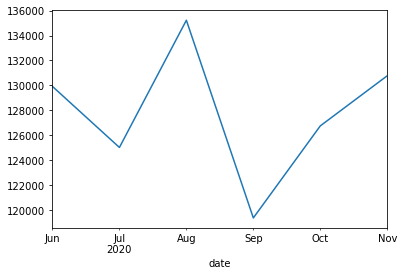

In [ ]:
orders.groupby(pd.Grouper(key='date', axis=0, freq='M')).size().plot()

In [ ]:
category_hierarchy.head()

,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


In [ ]:
category_hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   category         4332 non-null   int64
 1   parent_category  4332 non-null   int64
dtypes: int64(2)
memory usage: 67.8 KB


In [ ]:
category_hierarchy.nunique()

category           4300
parent_category     697
dtype: int64

In [ ]:
item_orders = pd.merge(orders, items, how="left", on="itemID")
item_orders.head()

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,2020-06-01,38769,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
1,2020-06-01,42535,30474,1,193,10,3,229,3,132,"[3459, 3738, 679, 1628, 4072]"
2,2020-06-01,42535,15833,1,1318,4,1,455,0,108,"[2973, 2907, 2749, 3357]"
3,2020-06-01,42535,20131,1,347,4,0,291,3,44,"[30, 1515, 1760, 2932, 1287, 2615, 3727, 2450,..."
4,2020-06-01,42535,4325,1,539,6,0,303,0,45,"[3104, 1772, 2029, 1274, 3915, 888, 1118, 3882..."


In [ ]:
user_item_volume = item_orders.groupby(["userID", "itemID"]).size().reset_index().rename(columns={0:'count'})
user_item_volume.sort_values(by="count", ascending=False)

,userID,itemID,count
102746,7109,14815,23
102754,7109,18780,21
501203,34638,4935,19
330402,22815,10849,18
399128,27594,16624,18
...,...,...,...
234928,16221,27915,1
234929,16221,31938,1
234930,16222,352,1
234931,16222,1325,1


In [ ]:
user_item_volume["count"].value_counts()

1     596243
2      52966
3      12025
4       3662
5       1353
6        563
7        232
8        126
9         48
10        24
11        22
12        10
13         6
14         5
17         5
15         4
16         2
18         2
23         1
21         1
19         1
Name: count, dtype: int64

<AxesSubplot:>

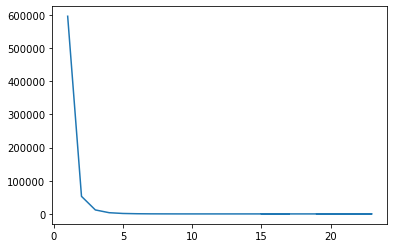

In [ ]:
user_item_volume["count"].value_counts().plot()

In [ ]:
NOW = dt(2020, 12, 1)

features = item_orders.groupby("userID").agg({
    "date": lambda x: (NOW - x.max()).days,
    "itemID": pd.Series.nunique,
    "order": ["mean", "sum"],
    }).reset_index()

features.columns = ["userID", "recency", "frequency", "quantity_avg", "quantity_total"]
features.tail()

,userID,recency,frequency,quantity_avg,quantity_total
45760,46133,9,20,1.095238,23
45761,46134,17,25,1.230769,32
45762,46135,18,6,1.666667,10
45763,46136,33,31,1.812500,58
45764,46137,75,5,1.400000,7


<AxesSubplot:>

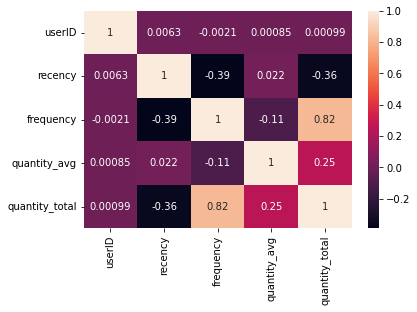

In [ ]:
sns.heatmap(features[features.columns].corr(), annot=True)

In [ ]:
target = pd.read_csv("Data/orders.csv", sep="|")
target["date"] = pd.to_datetime(target["date"])
target["week of month"] = target["date"].apply(lambda d: (d.day-1) // 7 + 1)
target["week of month"] = target["week of month"].replace(to_replace=5, value=0)
target

,date,userID,itemID,order,week of month
0,2020-06-01,38769,3477,1,1
1,2020-06-01,42535,30474,1,1
2,2020-06-01,42535,15833,1,1
3,2020-06-01,42535,20131,1,1
4,2020-06-01,42535,4325,1,1
...,...,...,...,...,...
1071533,2021-01-31,22114,29567,2,0
1071534,2021-01-31,22114,21068,1,0
1071535,2021-01-31,10900,18270,1,0
1071536,2021-01-31,17894,31265,5,0


In [ ]:
target["week of month"].value_counts()

2    252987
3    246415
1    237031
4    235858
0     99247
Name: week of month, dtype: int64

In [ ]:
submission_dec = pd.read_csv("Data/submission_dec.csv", sep="|")
submission_dec

,userID,itemID,prediction
0,0,20664,NaN
1,0,28231,NaN
2,13,2690,NaN
3,15,1299,NaN
4,15,20968,NaN
...,...,...,...
9740,46118,20106,NaN
9741,46124,19677,NaN
9742,46125,12878,NaN
9743,46127,7963,NaN


In [ ]:
submission_dec = pd.merge(submission_dec[["userID", "itemID"]], target[["userID", "itemID", "week of month"]], how="left", on=["userID", "itemID"])
submission_dec = submission_dec.groupby(["userID", "itemID"]).first().reset_index()
submission_dec = submission_dec.rename(columns = {"week of month": "prediction"})
submission_dec

,userID,itemID,prediction
0,0,20664,1
1,0,28231,3
2,13,2690,1
3,15,1299,2
4,15,20968,2
...,...,...,...
9740,46118,20106,1
9741,46124,19677,2
9742,46125,12878,1
9743,46127,7963,1


In [ ]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()

